### Module 3 InClass Assignment 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bike_day_raw.csv')

In [3]:
# Assume the dataset has columns for date/time and weather features
# Convert date column to datetime if it's not already
data['mnth'] = pd.to_datetime(data['mnth'])

X = data[['temp', 'hum', 'weathersit']]
y = data['cnt']


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.4560433574203029
Mean Squared Error: 2181202.106837651


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [8]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to a DataFrame for better handling
df = pd.DataFrame(X, columns=diabetes.feature_names)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

# Get coefficients
lin_reg_coeffs = lin_reg.coef_


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Set up the Ridge regression model
ridge = Ridge()

# Define the grid of parameters to search
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Create a GridSearchCV object
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5)
grid_ridge.fit(X_scaled, y)

# Get the best estimator and coefficients
best_ridge = grid_ridge.best_estimator_
ridge_coeffs = best_ridge.coef_


In [12]:
from sklearn.linear_model import Lasso

# Set up the Lasso regression model
lasso = Lasso()

# Define the grid of parameters to search
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Create a GridSearchCV object
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5)
grid_lasso.fit(X_scaled, y)

# Get the best estimator and coefficients
best_lasso = grid_lasso.best_estimator_
lasso_coeffs = best_lasso.coef_


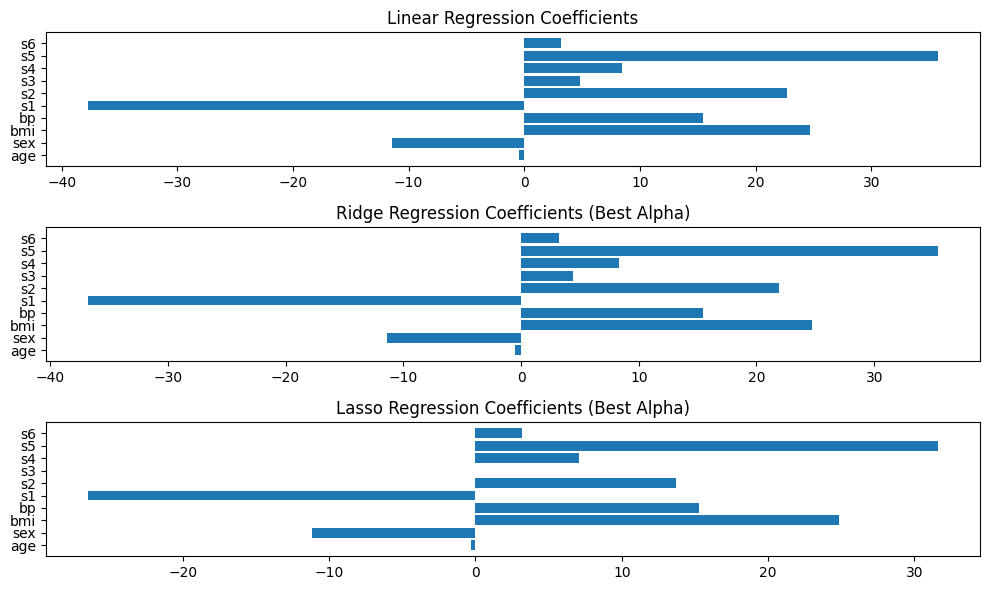

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create an array of feature names
features = diabetes.feature_names

# Plot the coefficients for Linear Regression
plt.subplot(3, 1, 1)
plt.barh(features, lin_reg_coeffs)
plt.title('Linear Regression Coefficients')

# Plot the coefficients for Ridge Regression
plt.subplot(3, 1, 2)
plt.barh(features, ridge_coeffs)
plt.title('Ridge Regression Coefficients (Best Alpha)')

# Plot the coefficients for Lasso Regression
plt.subplot(3, 1, 3)
plt.barh(features, lasso_coeffs)
plt.title('Lasso Regression Coefficients (Best Alpha)')

# Show the plots
plt.tight_layout()
plt.show()
